# ELABORATIONS OF THE EXECUTION TIMES

In this notebook, I am elaborating the time data for the weak scalability. All this time data are computed on a complex domain $[-2.75,1.25]\times[-2,2]$ with a maximum number of iterations equal to 30000. For each pixel, the point used to compute the Mandelbrot series is the center of it. This problem is solved repeatly (10 times) starting from 1 thread to 16 threads. However, the work load of each processor has been kept constant with increasing number of threads. To do so, I have fixed a work load equivalent of resolving the Mandelbrot series for a matrix of pixels of $400\times 400$, which is 160000 points to compute. Therefore, starting with 1 thread, I have fixed a grid of $400\times 400$ for the problem, then for 2 threads, I used a grid of $566\times 566\simeq 320000$ and so on. 

In [1]:
#Import some useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## USEFUL FUNCTIONS DEFINITION

Before starting to elaborate the execution time, let's define some useful functions to compute statistical momentums. Each dataframe I am considering is composed by 10 runs (columns), and for each column I have the times of the threads in the first rows and then the total execution time used by the process.

**MEAN**: Fixed the number of threads, this function will compute the mean execution time of the threads. Computed the means of each run, this function will calculate the mean of these ones, returning, in this way, the mean execution time for a thread when using that number of threads. All of this information about the runs are actually encased in the passed dataframes.

In [2]:
def MEAN(df):
    ms = np.zeros(df.shape[1],dtype=float) #Define the array of the means of the runs
    
    #Compute the mean for each run
    for j in range(df.shape[1]):
        m = 0.0
        for i in range(df.shape[0]-1):
            m += int(df.iat[i,j])
        ms[j] = m/(df.shape[0]-1)
        
    #The grand mean is simply the mean of the means
    return np.mean(ms)

**STD**: Analogously, this function will compute, for the mean computed using the function above, the associated STD.

In [3]:
def STD(df):
    ss = np.zeros(df.shape[1],dtype=float) #Define the array of the std of the runs
    ms = np.zeros(df.shape[1],dtype=float) #Define the array of the means of the runs

    #Compute the mean for each run
    for j in range(df.shape[1]):
        m = 0.0
        for i in range(df.shape[0]-1):
            m += int(df.iat[i,j])
        ms[j] = m/(df.shape[0]-1)
        
    #The case with a single thread has only 1 value so it has 0 std however the grand mean will have one
    #So we need to distinguish the two cases
    if(df.shape[0]-1>1):
        #For the regular cases the grand std is given by the square root of the ratio between the sum of the variances of the runs
        #and the number of runs. So we compute the variances  
        for j in range(df.shape[1]):
            s = 0.0
            for i in range(df.shape[0]-1):
                s += (int(df.iat[i,j])-ms[j])**2
            ss[j] = s/(df.shape[0]-2)
    else: #In this case the grand mean is actually a simple mean and we need to apply the classical STD.
        M = np.mean(ms)
        s = 0.0
        for j in range(df.shape[1]):
            s += (ms[j]-M)**2
        ss[0] = s
    
    #Return the std
    return np.sqrt(np.sum(ss)/df.shape[1])

**MEAN_MAX**: This mean function is used for another objective. In the last row of each dataframe, I have reported the total execution time used by the process to fully run. This function will simply compute the mean value of the total time for the 10 runs.

In [4]:
def MEAN_MAX(df):
    m = 0.0
    for j in range(df.shape[1]):
        m += df.iat[-1,j]
        
    return m/df.shape[1]

**STD_MAX**: And similarly, this function will compute its associated STD.

In [5]:
def STD_MAX(df):
    m = 0.0
    for j in range(df.shape[1]):
        m += int(df.iat[-1,j])
    m = m/df.shape[1]
    
    #In this case the STD is computed classicaly.
    s = 0.0
    for j in range(df.shape[1]):
        s += (int(df.iat[-1,j])-m)**2
    
    return np.sqrt(s/df.shape[1])

# PARALLEL SIMPLE

Let's first check the mean execution times for the parallel simple or, in other words, for the naive parallel algorithm.

In [6]:
#Import all the files containing the times of the runs for each case
P1 = pd.read_csv(r"parallel/1th.csv",delimiter=";",header=None) #1 thread
P2 = pd.read_csv(r"parallel/2th.csv",delimiter=";",header=None) #2 threads
P3 = pd.read_csv(r"parallel/3th.csv",delimiter=";",header=None) #3 threads
P4 = pd.read_csv(r"parallel/4th.csv",delimiter=";",header=None) #And so on ...
P5 = pd.read_csv(r"parallel/5th.csv",delimiter=";",header=None)
P6 = pd.read_csv(r"parallel/6th.csv",delimiter=";",header=None)
P7 = pd.read_csv(r"parallel/7th.csv",delimiter=";",header=None)
P8 = pd.read_csv(r"parallel/8th.csv",delimiter=";",header=None)
P9 = pd.read_csv(r"parallel/9th.csv",delimiter=";",header=None)
P10 = pd.read_csv(r"parallel/10th.csv",delimiter=";",header=None)
P11 = pd.read_csv(r"parallel/11th.csv",delimiter=";",header=None)
P12 = pd.read_csv(r"parallel/12th.csv",delimiter=";",header=None)
P13 = pd.read_csv(r"parallel/13th.csv",delimiter=";",header=None)
P14 = pd.read_csv(r"parallel/14th.csv",delimiter=";",header=None)
P15 = pd.read_csv(r"parallel/15th.csv",delimiter=";",header=None)
P16 = pd.read_csv(r"parallel/16th.csv",delimiter=";",header=None)

Imported the data files, I can compute now the mean and the std of each case

In [7]:
mom = np.zeros((16,2),dtype=float) #Array of statistical momentums

#Compute the means
mom[0][0] = MEAN(P1)
mom[1][0] = MEAN(P2)
mom[2][0] = MEAN(P3)
mom[3][0] = MEAN(P4)
mom[4][0] = MEAN(P5)
mom[5][0] = MEAN(P6)
mom[6][0] = MEAN(P7)
mom[7][0] = MEAN(P8)
mom[8][0] = MEAN(P9)
mom[9][0] = MEAN(P10)
mom[10][0] = MEAN(P11)
mom[11][0] = MEAN(P12)
mom[12][0] = MEAN(P13)
mom[13][0] = MEAN(P14)
mom[14][0] = MEAN(P15)
mom[15][0] = MEAN(P16)

#Compute the std
mom[0][1] = STD(P1)
mom[1][1] = STD(P2)
mom[2][1] = STD(P3)
mom[3][1] = STD(P4)
mom[4][1] = STD(P5)
mom[5][1] = STD(P6)
mom[6][1] = STD(P7)
mom[7][1] = STD(P8)
mom[8][1] = STD(P9)
mom[9][1] = STD(P10)
mom[10][1] = STD(P11)
mom[11][1] = STD(P12)
mom[12][1] = STD(P13)
mom[13][1] = STD(P14)
mom[14][1] = STD(P15)
mom[15][1] = STD(P16)

In [8]:
#Definition of the "x" variable for the plots a.k.a. the number of threads
threads = np.linspace(1,16,16)
print(threads)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


It is time to plot the results. Let's look firstly to the mean execution time of the threads.

<ErrorbarContainer object of 3 artists>

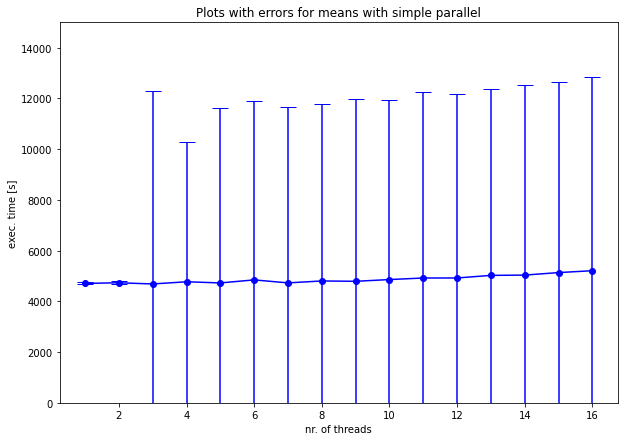

In [9]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for means with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,mom[:,0],color='b')
plt.ylim(0,15000)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='blue',capsize=8)

As observable, the mean time for a thread remains almost constant with an increasing number of threads and the size of the problem. This perfectly makes sense, however, the std of each point is quite big, except the first twos. This means that the required time for each thread can be quite different, therefore some of them will finish their work load in incredibly smaller time than others.

Nevertheless, the weak scalability for the mean execution time of the threads is quite good because it remains almost constant, with only a tiny growing trend. However, this enormous std is quite problematic because a lot of the threads spend time without doing anything.

Having this enormous std surely will affect the global execution time of the code because, even if some threads require a very short time, the general time required by the code depends on the worst of them. For this reason, I would like to take a look to the global times.

In [10]:
maxs = np.zeros((16,2),dtype=float) #Array of statistical momentums of global times

#Compute the means
maxs[0][0] = MEAN_MAX(P1)
maxs[1][0] = MEAN_MAX(P2)
maxs[2][0] = MEAN_MAX(P3)
maxs[3][0] = MEAN_MAX(P4)
maxs[4][0] = MEAN_MAX(P5)
maxs[5][0] = MEAN_MAX(P6)
maxs[6][0] = MEAN_MAX(P7)
maxs[7][0] = MEAN_MAX(P8)
maxs[8][0] = MEAN_MAX(P9)
maxs[9][0] = MEAN_MAX(P10)
maxs[10][0] = MEAN_MAX(P11)
maxs[11][0] = MEAN_MAX(P12)
maxs[12][0] = MEAN_MAX(P13)
maxs[13][0] = MEAN_MAX(P14)
maxs[14][0] = MEAN_MAX(P15)
maxs[15][0] = MEAN_MAX(P16)

#Compute the std
maxs[0][1] = STD_MAX(P1)
maxs[1][1] = STD_MAX(P2)
maxs[2][1] = STD_MAX(P3)
maxs[3][1] = STD_MAX(P4)
maxs[4][1] = STD_MAX(P5)
maxs[5][1] = STD_MAX(P6)
maxs[6][1] = STD_MAX(P7)
maxs[7][1] = STD_MAX(P8)
maxs[8][1] = STD_MAX(P9)
maxs[9][1] = STD_MAX(P10)
maxs[10][1] = STD_MAX(P11)
maxs[11][1] = STD_MAX(P12)
maxs[12][1] = STD_MAX(P13)
maxs[13][1] = STD_MAX(P14)
maxs[14][1] = STD_MAX(P15)
maxs[15][1] = STD_MAX(P16)

<ErrorbarContainer object of 3 artists>

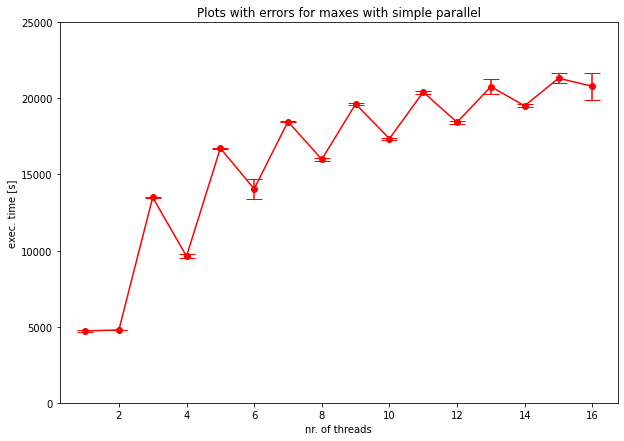

In [11]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for maxes with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.ylim(0,25000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)

Looking at this plot, the total execution time is quite high looking to the mean values and also it grows with the number of threads. Moreover, there are other interesting facts:

- Firstly, while the threads can have very different times, the global time have a smaller std. This is reasonable because, while the thread can have unbalanced work, the different processes resolve the same task therefore the total work load is the same. 
- Secondly, the execution time is higher for an odd number of threads, while for even ones is smaller. This is completely explainable: in the domain I have used, the Mandelbrot region is almost at the center of the $y$ axis. Thus, when there is an even number of threads, the central rows, the more time consuming, are splitted in half between two thread, while for odd number, it is the burden of a single thread. Obviosly, for fewer threads, the central region is assigned almost entirely to a single thread, while for more threads, some threads will split the burden due to the smaller domains of each one. However, the central lines have still an important effect. In fact, the fluctuations become smaller and smaller but are still perfectly visible also for 15-16 threads.

This final reason also explain the incredibly small std associated to 2 threads in the means plot. Moreover, this is actually also the cause of the big std in the means. In fact, the used algorithm splits the $y$ axis rows in regions, so the threads with an external region assigned will complete their task in no time, while the central one, incredibly more time consuming, will imply a much more longer computation time for the assigned thread.

Therefore, the weak scalability of the total time required by the process is far from optimal. The increasing of the problem in size, even if the work load stay the same, leads to longer execution time for the whole process, due to the increasing in sampling that transforms the critical regions (usually assign to only 1 or 2 threads) in a big set of time consuming computations. Generally speaking, this algorithm has a terrible weak scalability in term of whole process execution time.

Now I can plot the two lines together to highlight in a better way the differences of behaviour.

<ErrorbarContainer object of 3 artists>

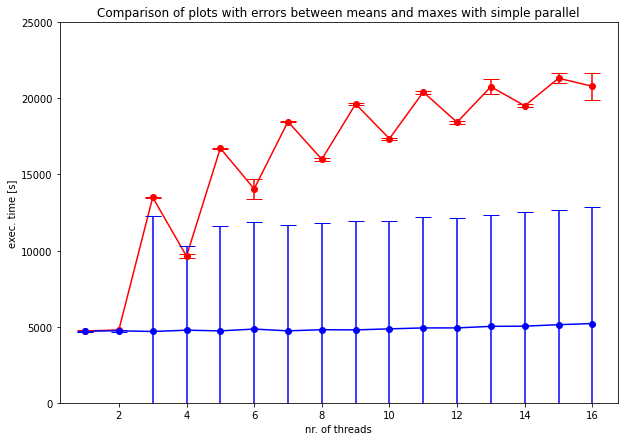

In [12]:
plt.figure(figsize=(10,7))
plt.title("Comparison of plots with errors between means and maxes with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.plot(threads,mom[:,0],color='b')
plt.ylim(0,25000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='blue',capsize=8)

As expected, the two behaviours are completely different. The time to resolve the problem is far bigger than the average time for a thread and also it becomes worse and worse moving right. It is important to solve this issue because, in the actual situation, the program is depleting a lot of time and resources with some very busy threads and others with almost no work.

# PARALLEL REFACTOR

The algorithm implemented in the refactored code splits randomly the rows between the threads, so each thread will have a sparce domain in the set of rows. Doing so, the very intensive rows shoud be splitted in almost equal way between the threads. I am expecting the same mean execution time but the total should be much lower than the one of the naive case.

In [13]:
#Import all the files containing the times of the experiments for each case
R1 = pd.read_csv(r"parallel_refactor/1th.csv",delimiter=";",header=None)
R2 = pd.read_csv(r"parallel_refactor/2th.csv",delimiter=";",header=None)
R3 = pd.read_csv(r"parallel_refactor/3th.csv",delimiter=";",header=None)
R4 = pd.read_csv(r"parallel_refactor/4th.csv",delimiter=";",header=None)
R5 = pd.read_csv(r"parallel_refactor/5th.csv",delimiter=";",header=None)
R6 = pd.read_csv(r"parallel_refactor/6th.csv",delimiter=";",header=None)
R7 = pd.read_csv(r"parallel_refactor/7th.csv",delimiter=";",header=None)
R8 = pd.read_csv(r"parallel_refactor/8th.csv",delimiter=";",header=None)
R9 = pd.read_csv(r"parallel_refactor/9th.csv",delimiter=";",header=None)
R10 = pd.read_csv(r"parallel_refactor/10th.csv",delimiter=";",header=None)
R11 = pd.read_csv(r"parallel_refactor/11th.csv",delimiter=";",header=None)
R12 = pd.read_csv(r"parallel_refactor/12th.csv",delimiter=";",header=None)
R13 = pd.read_csv(r"parallel_refactor/13th.csv",delimiter=";",header=None)
R14 = pd.read_csv(r"parallel_refactor/14th.csv",delimiter=";",header=None)
R15 = pd.read_csv(r"parallel_refactor/15th.csv",delimiter=";",header=None)
R16 = pd.read_csv(r"parallel_refactor/16th.csv",delimiter=";",header=None)

In [14]:
#Again, let's compute the means and the std associate to the execution time of a thread
momR = np.zeros((16,2),dtype=float)

momR[0][0] = MEAN(R1)
momR[1][0] = MEAN(R2)
momR[2][0] = MEAN(R3)
momR[3][0] = MEAN(R4)
momR[4][0] = MEAN(R5)
momR[5][0] = MEAN(R6)
momR[6][0] = MEAN(R7)
momR[7][0] = MEAN(R8)
momR[8][0] = MEAN(R9)
momR[9][0] = MEAN(R10)
momR[10][0] = MEAN(R11)
momR[11][0] = MEAN(R12)
momR[12][0] = MEAN(R13)
momR[13][0] = MEAN(R14)
momR[14][0] = MEAN(R15)
momR[15][0] = MEAN(R16)

momR[0][1] = STD(R1)
momR[1][1] = STD(R2)
momR[2][1] = STD(R3)
momR[3][1] = STD(R4)
momR[4][1] = STD(R5)
momR[5][1] = STD(R6)
momR[6][1] = STD(R7)
momR[7][1] = STD(R8)
momR[8][1] = STD(R9)
momR[9][1] = STD(R10)
momR[10][1] = STD(R11)
momR[11][1] = STD(R12)
momR[12][1] = STD(R13)
momR[13][1] = STD(R14)
momR[14][1] = STD(R15)
momR[15][1] = STD(R16)

In [15]:
threads = np.linspace(1,16,16)
print(threads)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Let's plot the mean execution time for a thread in the different cases

<ErrorbarContainer object of 3 artists>

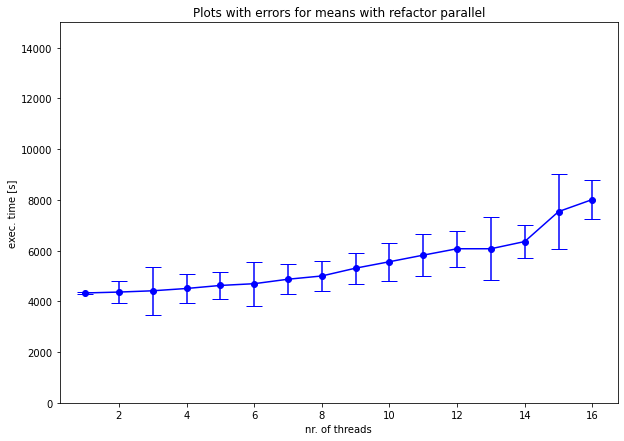

In [16]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for means with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,15000)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

As observable, the mean behaviour is quite similar to the one of the naive algorithm. Some differences are still present: the starting value is much lower than the upper situation and the growing trend is more visible. However, the std are so much smaller! This is perfect and it is exactly what I was hoping for. It is evident that the total time is also diminished. More precisely, the std tends to grow moving right. 

This is due to the randomization problem for higher number of threads. In fact, the critical region of the problem is quite limited, therefore when the code is randomly distributing the rows, for bigger numbers of threads, the probability of having some threads with a smaller portion of the critical region augments. This difference can be small, but, being the critical rows very time consuming, can transform a difference of a couple of rows in an important step in terms of execution times.

Now let's check the whole process execution times:

In [17]:
#Again, let's compute the means and the std associate to the total time of each run
maxsR = np.zeros((16,2),dtype=float)

maxsR[0][0] = MEAN_MAX(R1)
maxsR[1][0] = MEAN_MAX(R2)
maxsR[2][0] = MEAN_MAX(R3)
maxsR[3][0] = MEAN_MAX(R4)
maxsR[4][0] = MEAN_MAX(R5)
maxsR[5][0] = MEAN_MAX(R6)
maxsR[6][0] = MEAN_MAX(R7)
maxsR[7][0] = MEAN_MAX(R8)
maxsR[8][0] = MEAN_MAX(R9)
maxsR[9][0] = MEAN_MAX(R10)
maxsR[10][0] = MEAN_MAX(R11)
maxsR[11][0] = MEAN_MAX(R12)
maxsR[12][0] = MEAN_MAX(R13)
maxsR[13][0] = MEAN_MAX(R14)
maxsR[14][0] = MEAN_MAX(R15)
maxsR[15][0] = MEAN_MAX(R16)

maxsR[0][1] = STD_MAX(R1)
maxsR[1][1] = STD_MAX(R2)
maxsR[2][1] = STD_MAX(R3)
maxsR[3][1] = STD_MAX(R4)
maxsR[4][1] = STD_MAX(R5)
maxsR[5][1] = STD_MAX(R6)
maxsR[6][1] = STD_MAX(R7)
maxsR[7][1] = STD_MAX(R8)
maxsR[8][1] = STD_MAX(R9)
maxsR[9][1] = STD_MAX(R10)
maxsR[10][1] = STD_MAX(R11)
maxsR[11][1] = STD_MAX(R12)
maxsR[12][1] = STD_MAX(R13)
maxsR[13][1] = STD_MAX(R14)
maxsR[14][1] = STD_MAX(R15)
maxsR[15][1] = STD_MAX(R16)

<ErrorbarContainer object of 3 artists>

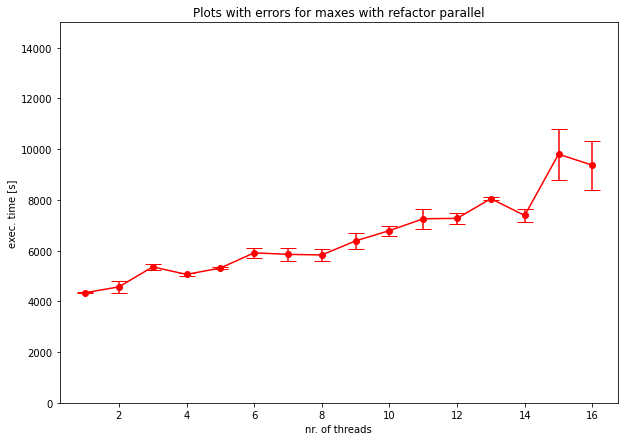

In [18]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for maxes with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxsR[:,0],color='r')
plt.ylim(0,15000)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='red',capsize=8)

At a first glance, they seem very similar but the best way is to check the comparison

<ErrorbarContainer object of 3 artists>

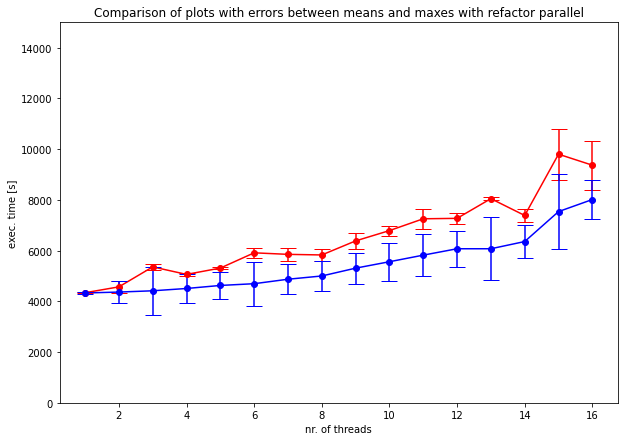

In [19]:
plt.figure(figsize=(10,7))
plt.title("Comparison of plots with errors between means and maxes with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxsR[:,0],color='r')
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,15000)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

Yes, they are! This algorithm has solve the problem. Now the threads have almost the same work load and, with this, the total time to compute the task has been strongly reduced. Therefore, this algorithm has improved the weak scalability both in trend and values! Moreover, it is noticeable a small issue and it is linked to the increase of the std. Moving right, the distance between the two plots grows, so the whole process execution time is becoming more and more different than the mean execution time of a thread.

# COMPARISONS

I can perform some other comparisons to obtain some extra information.

<ErrorbarContainer object of 3 artists>

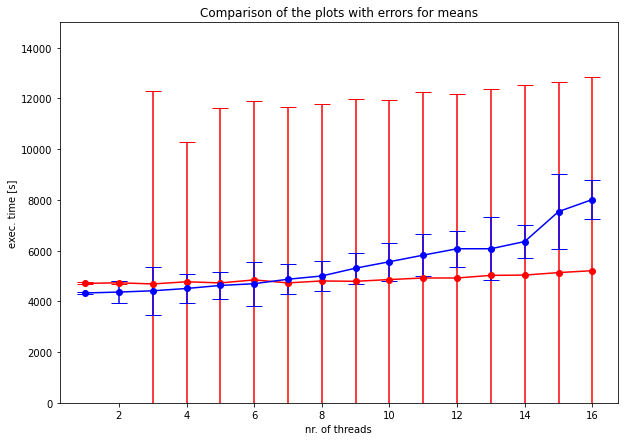

In [20]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for means")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,mom[:,0],color='r')
plt.plot(threads,momR[:,0],color='b')
plt.ylim(0,15000)
plt.errorbar(threads,mom[:,0],yerr=mom[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,momR[:,0],yerr=momR[:,1],fmt='o',color='blue',capsize=8)

As said, the two plots of the mean execution time are quite similar, even if the second algorithm has a worse growing trend that is not able to compensate the initial negative difference 

<ErrorbarContainer object of 3 artists>

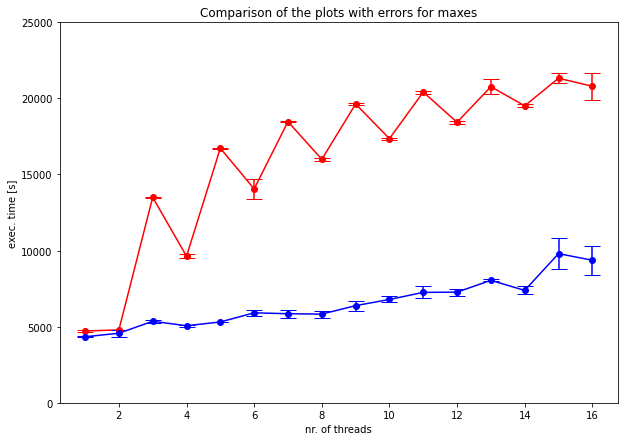

In [21]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for maxes")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,maxs[:,0],color='r')
plt.plot(threads,maxsR[:,0],color='b')
plt.ylim(0,25000)
plt.errorbar(threads,maxs[:,0],yerr=maxs[:,1],fmt='o',color='red',capsize=8)
plt.errorbar(threads,maxsR[:,0],yerr=maxsR[:,1],fmt='o',color='blue',capsize=8)

The total times are, on the other hand, quite different showing how much the second algorithm is far better optimized in term of weak scalability than the first one, both in terms of trend and values.

# RESIDUALS

A final interesting thing to take a look are the residuals. I have recorded the execution time of each thread but also the time for the whole process to take place. Finding the maximum in the threads' times and making the difference with the total time can give an approximation of the time used by the serial computations, preprocessings (most important) and saving processes. This is quite important, in particular for the second algorithm, where there is a work distribution method based on the random number generation, which can be quite time consuming. 

I start this analysis defining a function to compute this residuals:

In [22]:
def RESIDUAL(df):
    MM = np.zeros(df.shape[1],dtype=int) #Array of the maximum time used by a thread in the run

    for j in range(df.shape[1]):
        a = 0
        for i in range(df.shape[0]-1):
            if(int(df.iat[i,j])>a):
                a = int(df.iat[i,j])
        MM[j] = a
    
    for j in range(df.shape[1]): #Compute the residual for each run
        MM[j] = -(MM[j] - int(df.iat[-1,j]))
        
    #return the mean residual time and std
    return np.mean(MM),np.std(MM)

In [23]:
#Compute the residuals for the naive algorithm
res = np.zeros((16,2),dtype=float)

res[0][0],res[0][1] = RESIDUAL(P1)
res[1][0],res[1][1] = RESIDUAL(P2)
res[2][0],res[2][1] = RESIDUAL(P3)
res[3][0],res[3][1] = RESIDUAL(P4)
res[4][0],res[4][1] = RESIDUAL(P5)
res[5][0],res[5][1] = RESIDUAL(P6)
res[6][0],res[6][1] = RESIDUAL(P7)
res[7][0],res[7][1] = RESIDUAL(P8)
res[8][0],res[8][1] = RESIDUAL(P9)
res[9][0],res[9][1]= RESIDUAL(P10)
res[10][0],res[10][1] = RESIDUAL(P11)
res[11][0],res[11][1] = RESIDUAL(P12)
res[12][0],res[12][1] = RESIDUAL(P13)
res[13][0],res[13][1] = RESIDUAL(P14)
res[14][0],res[14][1] = RESIDUAL(P15)
res[15][0],res[15][1] = RESIDUAL(P16)

<ErrorbarContainer object of 3 artists>

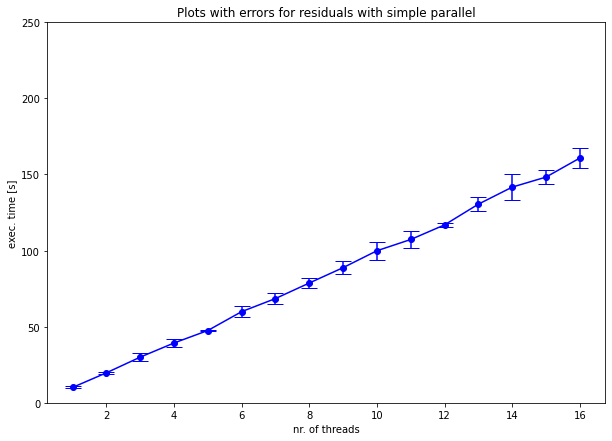

In [24]:
#And plot them
plt.figure(figsize=(10,7))
plt.title("Plots with errors for residuals with simple parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,res[:,0],color='b')
plt.ylim(0,250)
plt.errorbar(threads,res[:,0],yerr=res[:,1],fmt='o',color='blue',capsize=8)

As one can observe, the residual time depends linearly on the number of threads. It is quite small in its absolute value, in comparison both of the mean execution time and the total one. The growing trend is linear but with a fairy small parameter. 

Now, let's compute the residual for the refactor algorithm:

In [25]:
resR = np.zeros((16,2),dtype=float)

resR[0][0],resR[0][1] = RESIDUAL(R1)
resR[1][0],resR[1][1] = RESIDUAL(R2)
resR[2][0],resR[2][1] = RESIDUAL(R3)
resR[3][0],resR[3][1] = RESIDUAL(R4)
resR[4][0],resR[4][1] = RESIDUAL(R5)
resR[5][0],resR[5][1] = RESIDUAL(R6)
resR[6][0],resR[6][1] = RESIDUAL(R7)
resR[7][0],resR[7][1] = RESIDUAL(R8)
resR[8][0],resR[8][1] = RESIDUAL(R9)
resR[9][0],resR[9][1]= RESIDUAL(R10)
resR[10][0],resR[10][1] = RESIDUAL(R11)
resR[11][0],resR[11][1] = RESIDUAL(R12)
resR[12][0],resR[12][1] = RESIDUAL(R13)
resR[13][0],resR[13][1] = RESIDUAL(R14)
resR[14][0],resR[14][1] = RESIDUAL(R15)
resR[15][0],resR[15][1] = RESIDUAL(R16)

<ErrorbarContainer object of 3 artists>

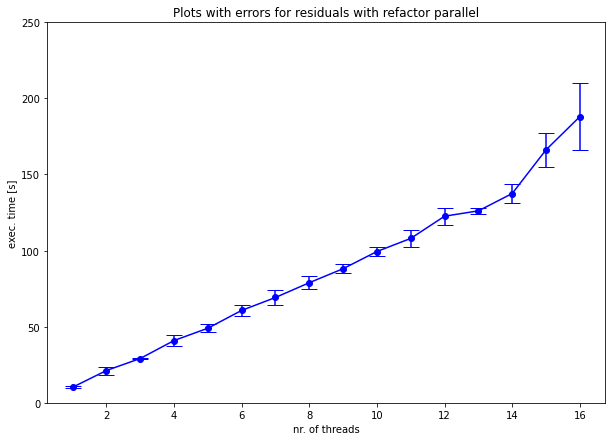

In [26]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for residuals with refactor parallel")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,resR[:,0],color='b')
plt.ylim(0,250)
plt.errorbar(threads,resR[:,0],yerr=resR[:,1],fmt='o',color='blue',capsize=8)

Again the residual time is still growing linearly and it is similar to the naive one! This is quite unexpected because we are generating random numbers to perform this and the preprocessing is made by a single thread! I can try to explain this behaviour:

- In the second algorithm, I am generating random numbers, however, there are some characteristics of our simulations that could have influeced these numbers. In the simulations, I was performing the algorithm on a grid in the region $[-2.75,1.25]\times[-2,2]$ with at most 1600 (16 threads case) intervals along each axis. Thus, there are only 1600 rows. Now, the random sorting is made in an efficient way assigning to each row a thread and not vice versa (more time consuming). This method needs only 1600 random number generations and, considering some optimization surely present inside the native random number process of C, is a very small mass of numbers to generate. Maybe using a very narrow sampling (e.g. 100000 points), the contribution will become far more larger. On the other hand, a very narrow sampling has almost no sense if one thinks that the results of the algorithm should be transformed into an image.
- Secondly, the first algorithm expresses the domains in a very efficient way because it is setting and recording only the limits that can be computed with some simple algebraic operations. Thus, it is quite difficult to justify this comparable times hanging on this. Moreover, it is computing only the upper limit (the last row) of each thread domain, because the lower is given by the upper limit of the previous thread. However, in the first algorithm I have split the domain computation between the threads, therefore each one has to compute its own upper limit, but this thread cannot exit the preprocessing until all the other threads have finished their job. This happens because the upper limit of the previous thread in ID-order is needed as lower limit. This necessary synchronization could have influenced the total time.  

I have insert also the comparison between the two plots to observe better the characteristics

<ErrorbarContainer object of 3 artists>

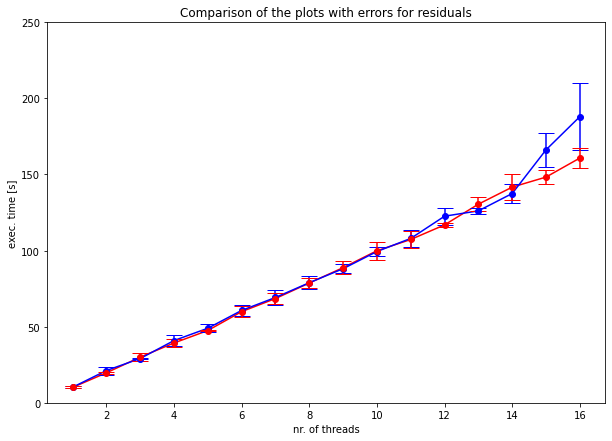

In [27]:
plt.figure(figsize=(10,7))
plt.title("Comparison of the plots with errors for residuals")
plt.xlabel("nr. of threads")
plt.ylabel("exec. time [s]")
plt.plot(threads,res[:,0],color='r')
plt.plot(threads,resR[:,0],color='b')
plt.ylim(0,250)
plt.errorbar(threads,resR[:,0],yerr=resR[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(threads,res[:,0],yerr=res[:,1],fmt='o',color='red',capsize=8)

Thus, the weak scalability, also of the preprocessing operations, is good and the necessary time is almost the same in both algorithms for any number of threads.